##**Supervised Learning with scikit-learn**
Scikit-learn:
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

There are two types of supervised learning we are going to explore: **classification and regression.**

### **Classification**
1. Scikit-learn workflow

* Build a model
* Model learns from a labeled data(training data) we pass to it
* Pass unlabeled data to the model as input
* Model predicts the labels of the unseen data




2. k-nearest neighbors(KNN)


* Look at the k(we choose) closest labeled data points
* Take a majority vote



3. Measure model performance by accuracy



> Model complexity curve: incremental k VS accuracy


* Larger k = less complex model = can cause underfitting
* Samller k = more complex model = can cause overfitting

4. Overfitting and underfitting 

Generating **accuracy scores** for the training and test sets using a KNN classifier with different n_neighbor values, and plot **accuracy VS number of neighbors** for training data and testing data. Then we get a model complexity curve and get an optimal number of neighbors of the model.

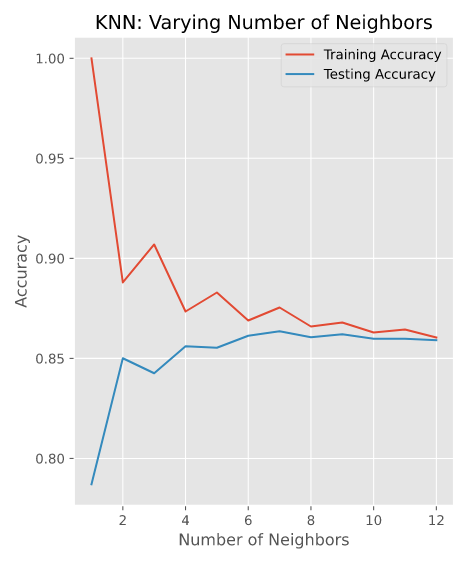



  

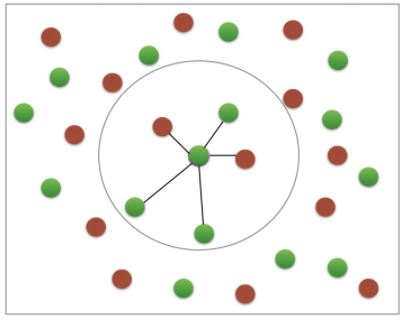 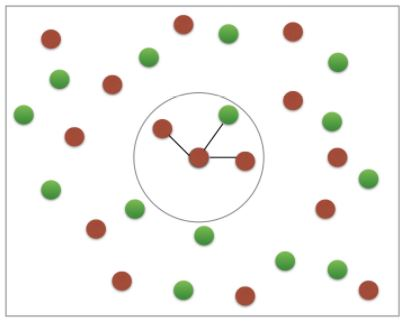

if k=3, we should classify it as red   
if k=5, we should classify it as green

###**Regression**


Pass two arrays to scikit-learn: features and target
R-square: quantifies the variance in target values explained by the features

```reg.score(X_test, y_test)```



1.   Creating feature and target arrays
2. Build a linear regression model and fit it to the data
3. Get the predictions
4. Measure model performance on testing data based on the loss function and R-square(default measurement)

Loss functions:
> - Ordinary least square(OLS)
- Mean squared error(MSE)
- Root mean squared error(RMSE)


5. Cross-validation and k-fold


6. Regularization regression
**Ridge regression**

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function. It penalizes large coefficients.

> α: hyperparameter we select to control complexity of models, α=0=OLS

low α can lead to overfitting

high α can lead to underfitting

We can create a scores list to evaluate differnt alpha in ridge regression

**Lasso regression**
- Lasso can select important features of a dataset
- Shrinks the coefficients of less important features to zero
- Features not shrunk to zero are selected by lasso

##**Fine-tuning your model**
Several metrics along with a visualization technique for analyzing classfication model performance using scikit-learn through the use of hyperparameter tuning.

**Classification metrics is not always useful**

For example, class imbalance


*   Classification for predicting fraudulent bank transactions
  - 99% of transactions are legitimate, 1% are fraudulent.
*   Could build a classifier that predicts NONE of the transactions are fraudulent
  - 99% accurate!
  - But terrible at actually predicting fraudulent transactions
  - Fails at its original purpose
* Class imbalance: Uneven frequency of classes
* Need a more nuanced metric to assess the performance of our model.

**Confusion matrix**
**Precision**: 

true positives/(true positives + false positives)

**Recall**:

true positives/(true positives + false negatives)
- High recall= lower false negatives
- High recall: Predicted nost fraudulent transactions correctly

This is also called sensitivity, hit rate, or true positive rate.

**F1 score**
2 x precision x recall/(precision + recall)

It's the harmonic mean of precision and recall, gives equal weight to precision and recall, therefore it factors in both the number of errors made by the model and the type of errors.

**Logicstic regression for binary classification**
- Logistic regression is used for classification problems
- Logistic regression outputs probabilities for classes
- If the probability, p>0.5:
  - The data is labeled 1
- If the probability, p>0.5:
  - The data is labeled 0

**Probability thresholds**

- By default, logistic regression threshold=0.5
- Not specific to logistic regression
  KNN classifiers also have thresholds
- What happens if we vary the thresholds?
  - The ROC curve: visualize how differnt thresholds affect true positive and false positive rates
 - When the threshold equals 0, 
, the model predicts '1' for all the data, which means the true positive rate is equal to the false positive rate, is equal to one.
 - When the threshold equals 1, 
, the model predicts '0' for all the data, which means that both true and false positive rates are 0.

  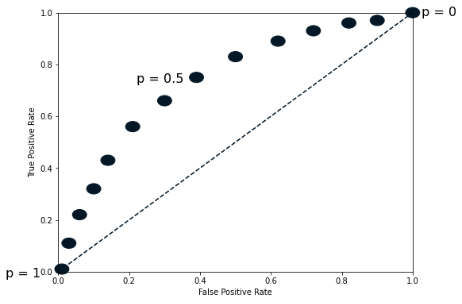


  The set of points we get when trying all positive thresholds, is called the receiver operating characteristic curve, or ROC curve.

  ROC - Receiver Operating Characteristic: a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The method was originally developed for operators of military radar receivers, which is why it is so named.

FPR: false positive rate
TPR: true positive rate
Thresholds

If we have a model with one for true postive rate and zero for false positive rate, this would be a perfect model. Therefore, we calculate the area under ROC curve, a metric known as AUC

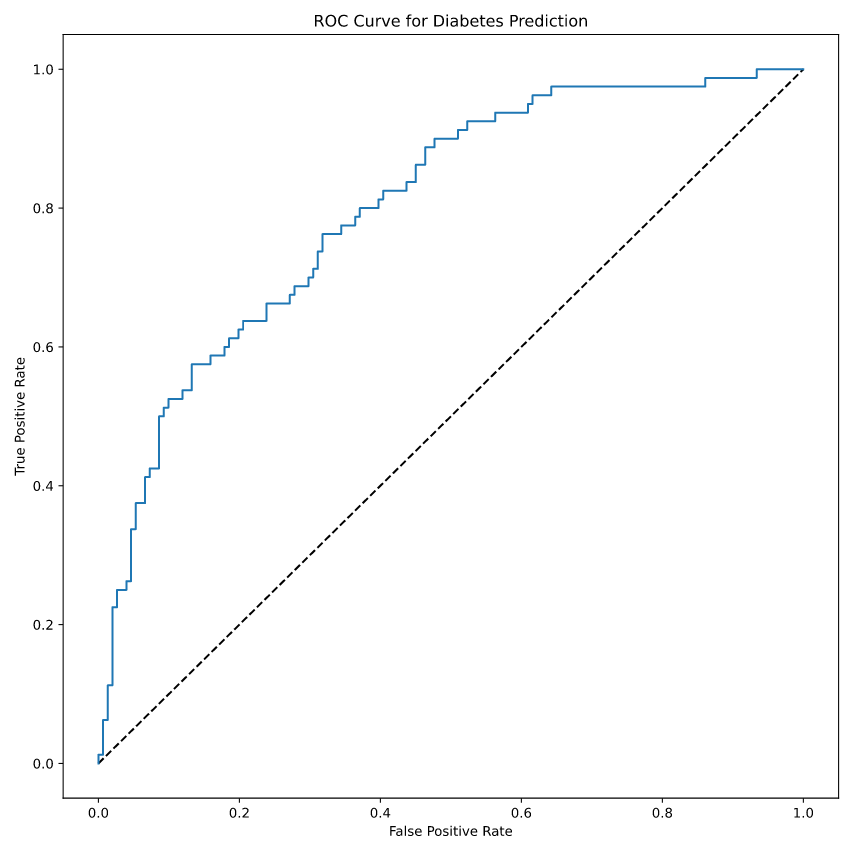

The model is much better than randomly guessing the class of each observation as the area under ROC curve is greater than 0.

**Hyperparameter tuning**
- Ridege/lasso regression: chosing `alpha`
- KNN: choosing `n_neighbors`
- Hyperarameters: parameters we specify before fitting the model like `alpha` and `n_neighbors`

1. Try lots of differnt hyperparameter values
2. Fit all of them separately
3. See how well they perform
4. Choose the best performing values

This is called hyperparameter tuning.

- It is essential to use cross-validation to avoid overfitting to the test set
- We can still split the data and perform cross-validation on the training set
- We withhold the test set for final evaluation

**Crid search cross-validation**

  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

Exhaustive search over specified parameter values for an estimator.

**Limitations and an alternative approach**

GridSearchCV can be computationally expensive: the number of fits is equal to the number of hyperparameters multiplied by the number of values multiplied by the number of folds.

**Randomized search cross-validation**

  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV



##**Preprocessing and Pipelines for messy data**

**Dealing with categorical features in Python**
- scikit-learn: `OneHotEncoder()`
- pandas: `get_dummies()`


**Handling missing data**
- Drop missing values
- Imputing value
  - Replace missing data with educated guesses
  - Common to use the mean, median
  - For categorical values, typically use the mode
  - Must split our data first, to avoid *data leakage*

  There are two main types of leakage: **target leakage** and **train-test contamination.**

  Due to the ability of imputers which are known as transformers.

**Imputing within a pipiline**

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

Note: in a pipeline, each step but the last must be a transformer

**Centering and scaling**

Why scale our data?
- Many models use some form of distance to inform them
- Features on larger scales can disproportionately influence the model
- Example: KNN uses distance explicity when make predictions
-  We want features to be on a similar scale

How to scale our data?
Note: before scaling, we split our data to avoid data leakage.

- Subtract the mean and divide by variance
  - All features are centered around zero and have a variance of one `StandardScalar()`
  - This is called standardization
- Can also substract the minimum and divide by the range
  - Minimum zero and maximum one
- Can centering/normalizing our data so the data ranges from -1 to +1

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing


1. Create X and y
  Deal with categorical and numerical features
2. Instantiate a model
3. Perform cross-validation `cross_val_score()`
4. Calculate RMSE and standard deviation 



**Cross validation and scaling in a pipeline**

- Specify hyperparameter space by creating a dictionary: the keys are the pipleline step name followed by a double underscore, followed by the hyperparameter name


In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, num=20)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
# Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.


# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

**Evaluating models for different problems**

Some guiding principles
- Size of the dataset
  - Fewer features = simpler model, faster training time
  - Some models require large amounts of data to perform well

- Interpretability
  - Some models are earier to explain, which can be important for stakeholders
  - Linear regression has high interpretability, as we can understand the coefficients
- Flexibility
  - May improve accuracy, by making fewer assumptions about data
  - KNN is a more felxible model, does not assume any linear relationships

It is all about metrics:

**Regression model performance**
  - RMSE
  - R-squared

**Classification mdoel performance**
  - Accuracy
  - Confusion matrix
  - Precision, recall, F1-score
  - ROC AUC

One approach is to select several models and a metric, then evaluate their performance without any form of hyperparameter tuning.

A note on scaling:
- Models affected by scaling
  - KNN
  - Linear Regression(plus Ridge, Lasso)
  - Logistic Regression
  - Artificial Neural Network

In [ ]:
# Create models dictionary
models = {"logreg": LogisticRegression(), "KNN": KNeighborsClassifier(), "decisonTree": DecisionTreeClassifier()}

results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)

  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

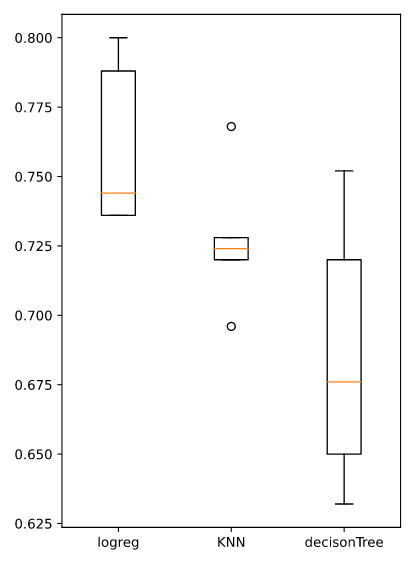

We can see from the boxplot that logistic regression has the largest accuracy score.

In [ ]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"], "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

##Recap
**What I have learned?**
- Using supervised learning techniques to build predictive models
- For both regression and classification problems
- Underfitting and overfitting
- How to split data
- Perform cross-validation

**What I have covered?**
- Data preprocessing techniques
- Model selection
- Hyperparameter tuning
- Model performance evaluation
- Using pipelines

**Wher to go from here?**
- Machine Learning with Tree-Based Models in Python
- Preprocessing for Machine Learning in Python
- Model validation in Python
- Feature Engineering for Machine Learning in Python
- Unsupervised Learning in Python
- Machine Learning Projects
